# Analisis columna por columna: correlacion y aporte de cada columna

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
from content.initial_analysis_step import get_clean_data

trainData = get_clean_data("./content/sample_data/train.csv")
testData = get_clean_data("./content/sample_data/test.csv")

In [2]:
#Correlation Matrix

def get_redundant_pairs(df):
  '''Get diagonal and lower triangular pairs of correlation matrix'''
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i + 1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop


def get_top_abs_correlations(df, n=60):
  corr_matrix = df.corr().abs()

  #the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                    .stack()
                    .sort_values(ascending=False))
  return sol[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(trainData))

Top Absolute Correlations
tipo_avaluo_Hipotecario                   tipo_avaluo_Remates                              1.000000
area_actividad_MIxta                      uso_principal_ph_Comercial - Residencial         1.000000
area_actividad_CAE-1                      uso_principal_ph_Comercio de bienes              1.000000
uso_actual_Hotelero                       uso_principal_ph_Hospedaje                       1.000000
area_actividad_privada                    uso_principal_ph_residencial unifamiliar         1.000000
area_actividad_comercial                  uso_principal_ph_deposito o bodega               1.000000
area_actividad_Zona Suburbana             uso_principal_ph_Casas campestres y fincas       1.000000
area_actividad_Zona Múltiple central      uso_principal_ph_Comercio y Vivienda             1.000000
area_actividad_ZONA TECNOLOGIA            uso_principal_ph_RESIDENCIAL - EDUCATIVO         1.000000
area_actividad_Residencial - TurÃ­stico   uso_principal_ph_Residencial - T

/tmp/ipykernel_145779/1883928137.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Notamos que las siguientes columnas pueden ser redundantes entre si

```
tipo_avaluo_Hipotecario                   tipo_avaluo_Remates                              1.000000 # Pueden mantenerse
area_actividad_MIxta                      uso_principal_ph_Comercial - Residencial         1.000000 # Parece que Mixta se refiere a lo mismo, asi que eliminare "Mixta" pues es menos claro por su nombre
area_actividad_CAE-1                      uso_principal_ph_Comercio de bienes              1.000000 # Eliminare "area_actividad_CAE-1"
uso_actual_Hotelero                       uso_principal_ph_Hospedaje                       1.000000 # Eliminare "uso_principal_ph_Hospedaje"
area_actividad_privada                    uso_principal_ph_residencial unifamiliar         1.000000 # Eliminare "area_actividad_privada"
area_actividad_comercial                  uso_principal_ph_deposito o bodega               1.000000 # Eliminare ""
area_actividad_Zona Suburbana             uso_principal_ph_Casas campestres y fincas       1.000000
area_actividad_Zona Múltiple central      uso_principal_ph_Comercio y Vivienda             1.000000
area_actividad_ZONA TECNOLOGIA            uso_principal_ph_RESIDENCIAL - EDUCATIVO         1.000000
area_actividad_Residencial - TurÃ­stico   uso_principal_ph_Residencial - TurÃ­stico        1.000000
uso_actual_Construcción Viviendas         uso_principal_ph_USO MULTIPLE  RESIDENCIL        1.000000
area_actividad_CAE - 2                    uso_principal_ph_Comercio bienes                 1.000000
area_actividad_Area de Baja Mixtura       uso_principal_ph_Predominante residencial        1.000000
area_actividad_MIXTO RESID. Y TURISTICO   uso_principal_ph_RESIDENCIAL- TURISTICO          1.000000
area_actividad_AREA DE ACTIVIDAD CENTRAL  uso_principal_ph_Residencial-Comercio            1.000000
area_actividad_SUBURBANA                  uso_principal_ph_TURISTICA, RESIDENCIAL          1.000000
area_actividad_96.54                      uso_principal_ph_VIVVIENDA                       1.000000
uso_actual_Hotelero                       area_actividad_Hotelera                          1.000000
area_actividad_COMERCIAL                  uso_principal_ph_COMERCIO LIVIANO                1.000000
area_actividad_107.12                     uso_principal_ph_Rersidencial                    1.000000
area_actividad_Redes. MÃºltiple           uso_principal_ph_MÃºltiple                       1.000000
area_actividad_ÁREA RESIDENCIAL TURISTI   uso_principal_ph_RESIDENCIAL Y HOTELERA          1.000000
area_actividad_RESIDENCIAL ZR2            uso_principal_ph_RESIDENCIAL ZR2                 1.000000
tipo_inmueble_Lote Urbano                 detalle_material_Pórticos y paneles en madera    1.000000
area_actividad_RESIDENCIAL Y SERVICIOS    uso_principal_ph_VIVIENDA Y SERVICIOS            1.000000
area_actividad_RESIDENCIAL Y COMERCIO     uso_principal_ph_VIVIENDA, SERV Y COMERCIO       1.000000
area_actividad_RESIDENCIAL E INDUSTRIAL   uso_principal_ph_VIVIENDA E INDUSTRIA            1.000000
area_actividad_HABITACIONAL               uso_principal_ph_HABITACIONAL                    1.000000
area_actividad_Hotelera                   uso_principal_ph_Hospedaje                       1.000000
area_actividad_PR-2,  CAE 2               uso_principal_ph_RESIDENCIAL - COMERCIAL         1.000000
area_actividad_NO SUMISTRADA              uso_principal_ph_PARCELACIÃ“N RESIDENCIAL        1.000000
area_actividad_Multiple                   uso_principal_ph_Multiple                        1.000000
area_actividad_Mixto Tipo 1               uso_principal_ph_Residencial y Comercio 1        1.000000
area_actividad_MIXTO 2                    uso_principal_ph_COMERCIAL -RESIDENCIAL          1.000000
area_actividad_47.8                       uso_principal_ph_TURISMO                         1.000000
tipo_credito_Diferente de Vivienda        tipo_credito_Vivienda                            1.000000
```

Podemos notar que la columna `area_actividad` se complementa con la de `uso_principal`, deberia ser seguro quitar una, me parece que quitare `uso_principal` pues tiene nombres menos descriptivos. Otro caso similar es `uso_actual`.


En las siguientes columnas vemos mas correlaciones interesantes

```
objeto_Remate                             tipo_avaluo_Remates                              0.998184
                                          tipo_avaluo_Hipotecario                          0.998184
area_actividad_0                          uso_principal_ph_0                               0.997441
vigilancia_privada                        tipo_vigilancia                                  0.993639
material_de_construccion_Mixtas u Otro    detalle_material_0                               0.990750
objeto_Originación                        proposito_Garantía Hipotecaria                   0.976575
iluminacion_Bueno                         iluminacion_Regular                              0.974542
tipo_inmueble_Apartamento                 tipo_inmueble_Casa                               0.959004
proposito_GarantÃ­a Hipotecaria           proposito_Garantía Hipotecaria                   0.958963
unidades                                  contadores_agua                                  0.958121
objeto_Originación                        proposito_GarantÃ­a Hipotecaria                  0.954067
numero_total_de_garajes                   total_cupos_parquedaro                           0.953010
irregularidad_planta                      irregularidad_altura                             0.951851
objeto_OriginaciÃ³n                       proposito_Garantía Hipotecaria                   0.933573
                                          objeto_Originación                               0.928806
motivo_Remates                            tipo_avaluo_Remates                              0.921854
                                          tipo_avaluo_Hipotecario                          0.921854
objeto_OriginaciÃ³n                       proposito_GarantÃ­a Hipotecaria                  0.920359
```

Notamos que `uso_principal_ph` corresponde con `area_actividad`; `vigilancia_privada` with `tipo_vigilancia`; `unidades` con `contadores_agua` ; `numero_total_de_garajes` con `total_cupos_parquedaro` ; `objeto_Remate` con `motivo_Remates`. Se procedera a eliminar las columnas redundantes.

In [3]:
redundant_columns = [
  'uso_principal_ph_Comercial - Residencial',
  'uso_principal_ph_Comercio de bienes',
  'uso_principal_ph_Hospedaje',
  'uso_principal_ph_residencial unifamiliar',
  'uso_principal_ph_deposito o bodega',
  'uso_principal_ph_Casas campestres y fincas',
  'uso_principal_ph_Comercio y Vivienda',
  'uso_principal_ph_RESIDENCIAL - EDUCATIVO',
  'uso_principal_ph_Residencial - TurÃ­stico',
  'uso_principal_ph_USO MULTIPLE  RESIDENCIL',
  'uso_principal_ph_Comercio bienes',
  'uso_principal_ph_Predominante residencial',
  'uso_principal_ph_RESIDENCIAL- TURISTICO',
  'uso_principal_ph_Residencial-Comercio',
  'uso_principal_ph_TURISTICA, RESIDENCIAL',
  'uso_principal_ph_VIVVIENDA',
  'area_actividad_Hotelera',
  'uso_principal_ph_COMERCIO LIVIANO',
  'uso_principal_ph_Rersidencial',
  'uso_principal_ph_MÃºltiple',
  'uso_principal_ph_RESIDENCIAL Y HOTELERA',
  'uso_principal_ph_RESIDENCIAL ZR2',
  'uso_principal_ph_VIVIENDA Y SERVICIOS',
  'uso_principal_ph_VIVIENDA, SERV Y COMERCIO',
  'uso_principal_ph_VIVIENDA E INDUSTRIA',
  'uso_principal_ph_HABITACIONAL',
  'uso_principal_ph_Hospedaje',
  'uso_principal_ph_RESIDENCIAL - COMERCIAL',
  'uso_principal_ph_PARCELACIÃ“N RESIDENCIAL',
  'uso_principal_ph_Multiple',
  'uso_principal_ph_Residencial y Comercio 1',
  'uso_principal_ph_COMERCIAL -RESIDENCIAL',
  'uso_principal_ph_TURISMO',
  'uso_principal_ph_0',
  'tipo_vigilancia',
  'unidades',
  'total_cupos_parquedaro',
  'motivo_Remates',
]

trainData = trainData.drop(redundant_columns, axis=1)
trainData.shape


(9629, 828)

In [4]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(trainData))

Top Absolute Correlations
tipo_avaluo_Hipotecario                 tipo_avaluo_Remates                              1.000000
tipo_inmueble_Lote Urbano               detalle_material_Pórticos y paneles en madera    1.000000
tipo_credito_Diferente de Vivienda      tipo_credito_Vivienda                            1.000000
sector_Rural                            sector_Urbano                                    0.998388
objeto_Remate                           tipo_avaluo_Remates                              0.998184
                                        tipo_avaluo_Hipotecario                          0.998184
material_de_construccion_Mixtas u Otro  detalle_material_0                               0.990750
objeto_Originación                      proposito_Garantía Hipotecaria                   0.976575
iluminacion_Bueno                       iluminacion_Regular                              0.974542
tipo_inmueble_Apartamento               tipo_inmueble_Casa                               0.9

/tmp/ipykernel_145779/1883928137.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Notamos que ya se no hay tantas columnas relacionadas entre si.

Ahora comparemos con la columna objetivo, y veamos que correlacion hay, para quitar las que tienen menos correlacion

In [5]:
print(trainData.corrwith(trainData['valor_total_avaluo']).abs().sort_values()[0:63])

estado_acabados_pisos                         0.000025
irregularidad_planta                          0.000075
uso_actual_Educación                          0.000124
area_actividad_Residencial e institucion      0.000146
area_actividad_Sector TecnolÃ³gico            0.000150
                                                ...   
uso_principal_ph_Institucion 3 - Comerci 2    0.000270
area_actividad_Area de Actividad Central      0.000270
area_actividad_MIXTO 2                        0.000270
area_actividad_Ãrea de actividad residen     0.000271
uso_principal_ph_VIVIENDA CAMPESTRE           0.000271
Length: 63, dtype: float64


Removemos esas 50 que menos contribuyen

In [6]:
unrelated_columns = [
  'estado_acabados_pisos',
  'irregularidad_planta',
  'uso_actual_Educación',
  'area_actividad_Residencial e institucion',
  'area_actividad_Sector TecnolÃ³gico',
  'area_actividad_327.75',
  'uso_principal_ph_Res. comercio y servicios',
  'uso_principal_ph_Vivienda Rural',
  'area_actividad_Residencial Tipo D',
  'area_actividad_Area de Manejo Suburbano',
  'area_actividad_Suburbana',
  'estructura_Tradicional',
  'area_actividad_Plan Zonal rural',
  'estructura_Industrializada',
  'uso_principal_ph_Viv uni, bi y multifamili',
  'uso_principal_ph_VIVIENDA  CAMPESTRE',
  'area_actividad_RESIDENCIAL TIPO D',
  'uso_principal_ph_Instituc 3 - Comercial 2',
  'area_actividad_Netamente Residencial',
  'uso_principal_ph_condominio campestre',
  'area_actividad_Sector de TecnologÃ­a',
  'area_actividad_Corredor Suburbano',
  'area_actividad_MIXTA. RESI. - COMERCIAL',
  'uso_principal_ph_Residencial  Tusitica',
  'area_actividad_ZONA TECNOLOGIA',
  'area_actividad_vVvienda',
  'area_actividad_Zona Suburbana',
  'motivo_Leasing Inmobiliario - Persona Natural',
  'uso_actual_Hotelero',
  'uso_principal_ph_VIVIENDA  MULTIFAMILIAR',
  'uso_principal_ph_residencial campestre',
  'uso_principal_ph_VIvienda',
  'area_actividad_138.96',
  'uso_principal_ph_Residencial Rural',
  'uso_principal_ph_vivienda campestre',
  'area_actividad_Vivienda campestre',
  'uso_principal_ph_reisdencial',
  'area_actividad_135.80000000000001',
  'area_actividad_243',
  'uso_principal_ph_RESIDENCIAL- SALUD',
  'uso_principal_ph_VIVIENDA ULTIFAMILIAR',
  'area_actividad_161',
  'estructura_Otros',
  'area_actividad_162,28',
  'area_actividad_Residencial-Comercial',
  'uso_principal_ph_Vivienda, Fincas',
  'area_actividad_-',
  'area_actividad_resdencial',
  'uso_principal_ph_Residencial limitado come',
  'area_actividad_Residencial y otros',
  'area_actividad_674.90',
  'area_actividad_121.98',
  'area_actividad_114.42',
  'area_actividad_214.09',
  'uso_principal_ph_Vivienda Recreativa',
  'area_actividad_ResidencIal R-1',
  'area_actividad_SUBURBANA',
  'area_actividad_RESIDENCIAL Y HOTELERO',
  'uso_principal_ph_Institucion 3 - Comerci 2',
  'uso_principal_ph_Resiencial',
  'area_actividad_88.47',
  'area_actividad_PR 1',
  'area_actividad_Residencial Tipo B',
  'area_actividad_VIVENDA',
]

trainData = trainData.drop(unrelated_columns, axis=1)
trainData.shape

(9629, 764)

Para seguir afinando el modelo usaremos un clasificador de arbol

In [7]:
# modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

import time

from io import StringIO #entrada y salida de datos png
from IPython.display import Image  #graficar con colores
from sklearn.tree import export_graphviz #crear graficos de Tree
import six   # sklearn.externals.six
import sys   # sklearn.externals.six
sys.modules['sklearn.externals.six'] = six # sklearn.externals.six

from sklearn.metrics import roc_auc_score, roc_curve

#procesamiento del modelo 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()

y = trainData['valor_total_avaluo']/ 1e9
trainData = trainData.drop('valor_total_avaluo', axis=1)

scaler.fit(trainData)
# dict(trainData.dtypes)
trainX, testX, trainY, testY = train_test_split(trainData, y, test_size=0.3)
trainXX = scaler.transform(trainX)
testXX = scaler.transform(testX)
trainX.shape

(6740, 763)

In [9]:
# Calcula el mean_absolute_percentage_error. El vector y_true no puede tener 0
def mape(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def plotScatterModel(aX, aY, bX, bY, model):
    paY = model.predict(aX)
    pbY = model.predict(bX)
    #Print the score on the train data
    print('R2')
    print({'Training': model.score(trainXX, trainY), 'Test': model.score(testXX, testY) })

    print('\nMAPE')
    print({'Training ': mape(trainY, paY), 'Test': mape(testY, pbY)})

    # declarando un objeto tipo Figura para desarrollar los subplots
    fig = plt.figure(figsize=(20, 8))

    ax = fig.add_subplot(1,2,1)
    plt.scatter(aY, paY, s = 0.1)
    plt.title('Correlation in training set')


    ax2 = fig.add_subplot(1,2,2)
    plt.scatter(bY, pbY, s = 0.1)
    plt.title('Correlation in test set')

R2
{'Training': 0.09047273436991343, 'Test': -4.048919848424632e+27}

MAPE
{'Training ': 276391.65684374986, 'Test': 4.977163506236029e+17}


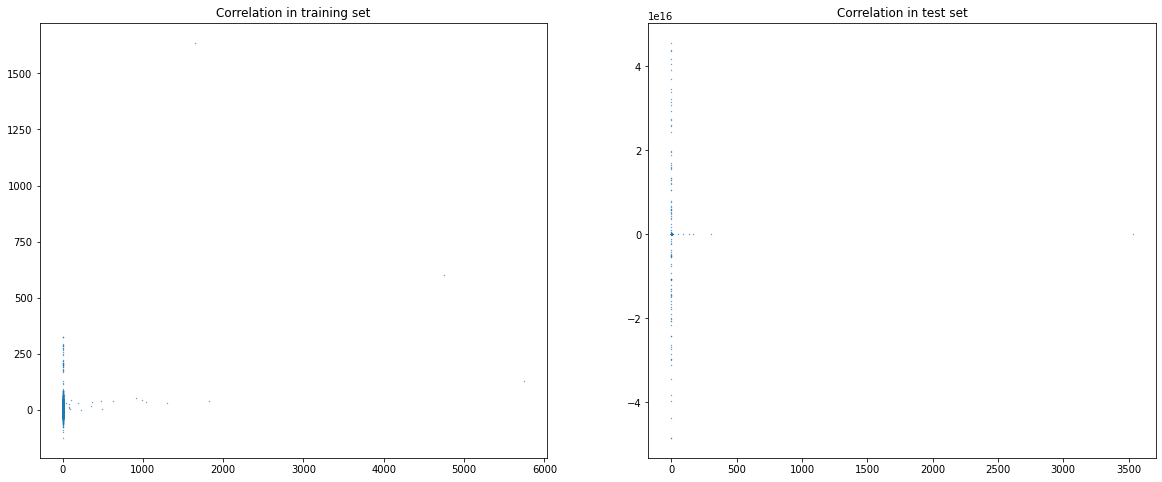

In [10]:
from sklearn.linear_model import LinearRegression

modelLM = LinearRegression()
modelLM.fit(trainXX, trainY);


plotScatterModel(trainXX, trainY, testXX, testY, modelLM)

## Decision Tree Regression.

R2
{'Training': 0.9999999999996914, 'Test': -4.868183429870585}

MAPE
{'Training ': 0.0027175154456430704, 'Test': 87044.92429628699}
Tiempo de entrenamiento es: 0.2911839485168457


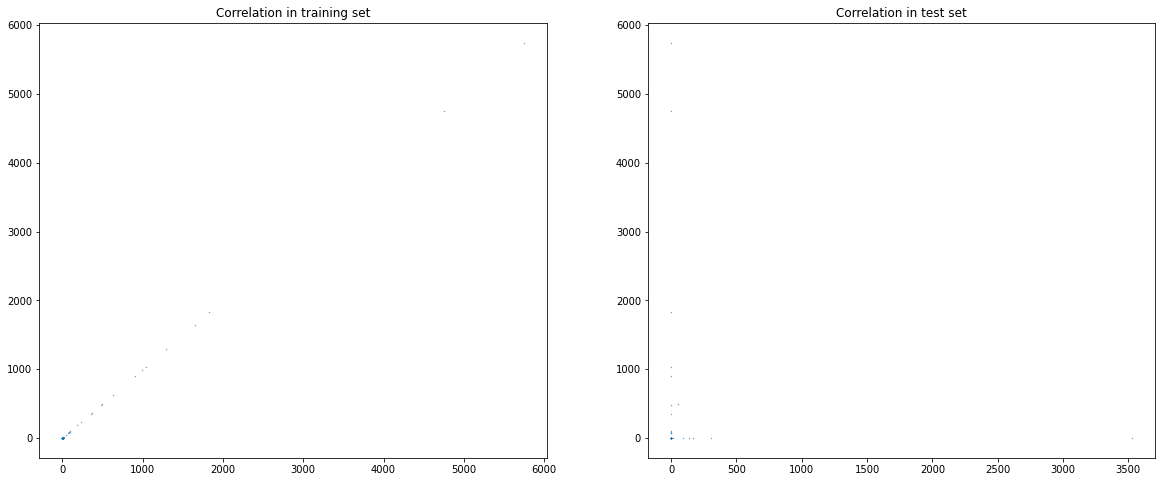

In [11]:
from sklearn.tree import DecisionTreeRegressor
#Completar

modelDTR = DecisionTreeRegressor()
start = time.time()
modelDTR.fit(trainXX, trainY);
stop = time.time()
plotScatterModel(trainXX, trainY, testXX, testY, modelDTR)
print('Tiempo de entrenamiento es:' , stop-start)

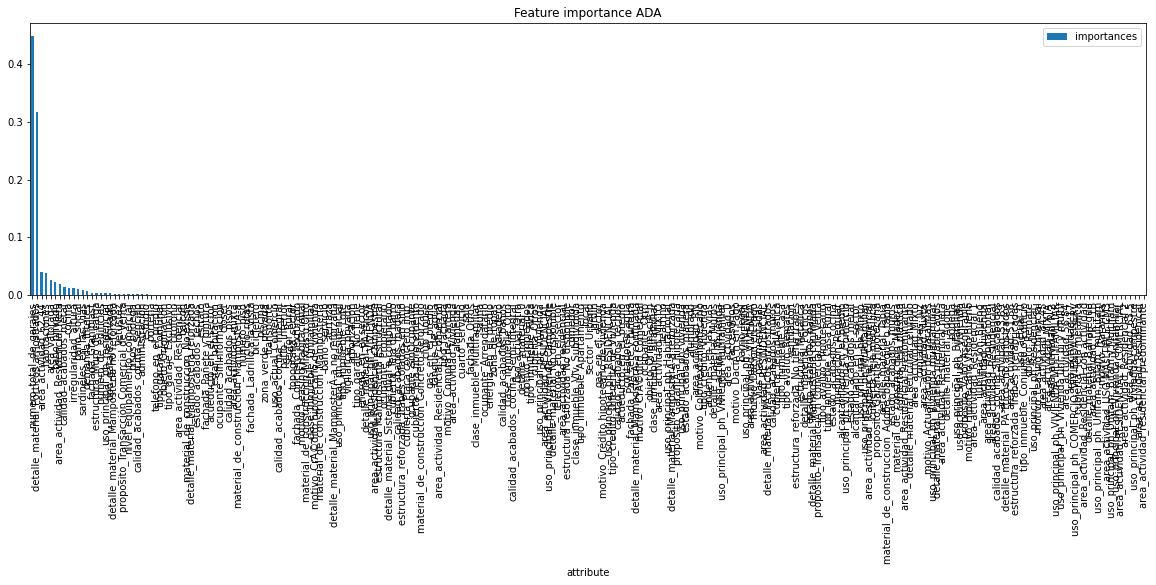

In [12]:
import pandas as pd
def graph_importances(model):
    attributes = trainX.columns[model.feature_importances_> 0]
    importances = model.feature_importances_[model.feature_importances_> 0]
    reportOfAttributes = pd.DataFrame({'attribute': attributes, 'importances': importances})
    reportOfAttributes = reportOfAttributes.sort_values(by = 'importances',  ascending=False)
    reportOfAttributes = reportOfAttributes.set_index('attribute')
    reportOfAttributes.plot(kind='bar', figsize=(20, 5)).set_title('Feature importance ADA')
    sum(model.feature_importances_> 0)

graph_importances(modelDTR)

## XGBOOST

R2
{'Training': 0.9644675617157503, 'Test': -0.272678188295024}

MAPE
{'Training ': 126514.60094359466, 'Test': 414330.4194857302}
Tiempo de entrenamiento es: 2.897083044052124


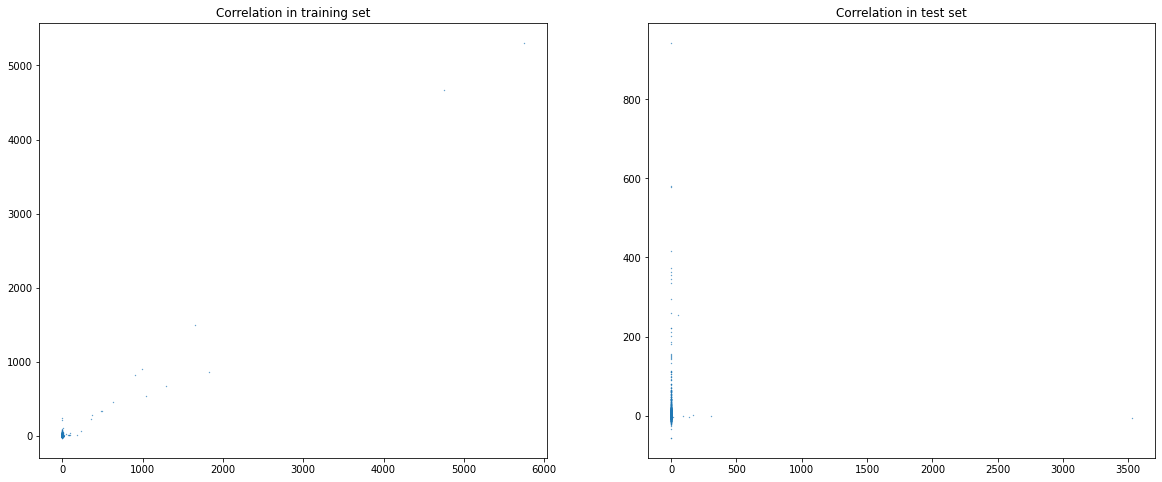

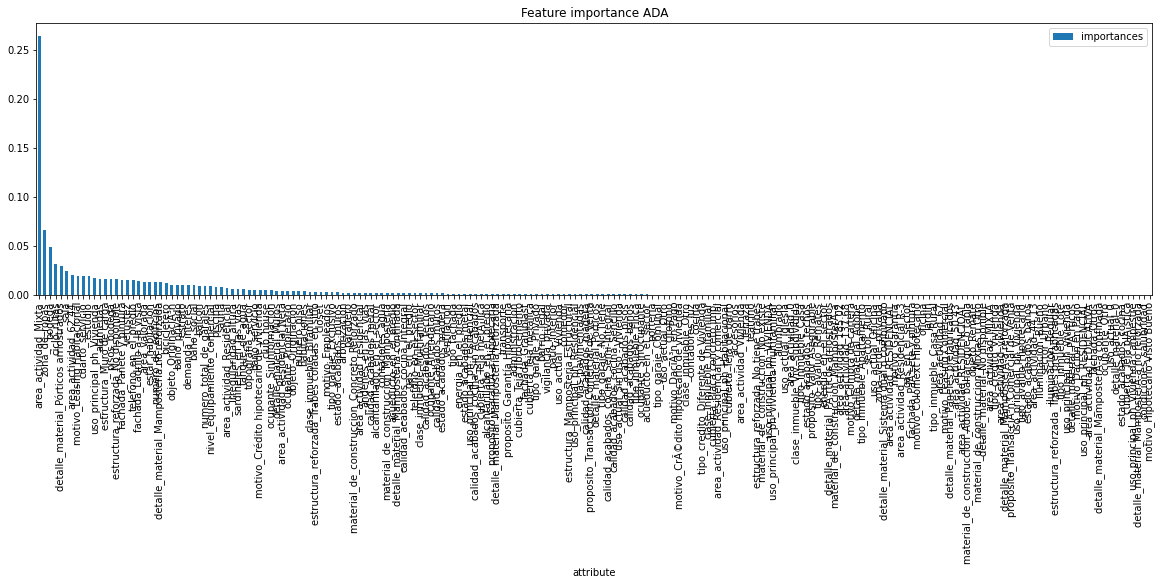

In [13]:
import xgboost as xgb
modelXGB = xgb.XGBRegressor(objective="reg:squarederror", colsample_bytree=0.2, learning_rate=0.1, max_depth=5, alpha=5, n_estimators=200)
start = time.time()
modelXGB.fit(trainXX, trainY)
stop = time.time()
plotScatterModel(trainXX, trainY, testXX, testY, modelXGB)
graph_importances(modelXGB)
print('Tiempo de entrenamiento es:' , stop-start)

## ADABoost

R2
{'Training': 0.7321316518748051, 'Test': -0.3032680963257415}

MAPE
{'Training ': 227281.71741529173, 'Test': 1070889.703472231}


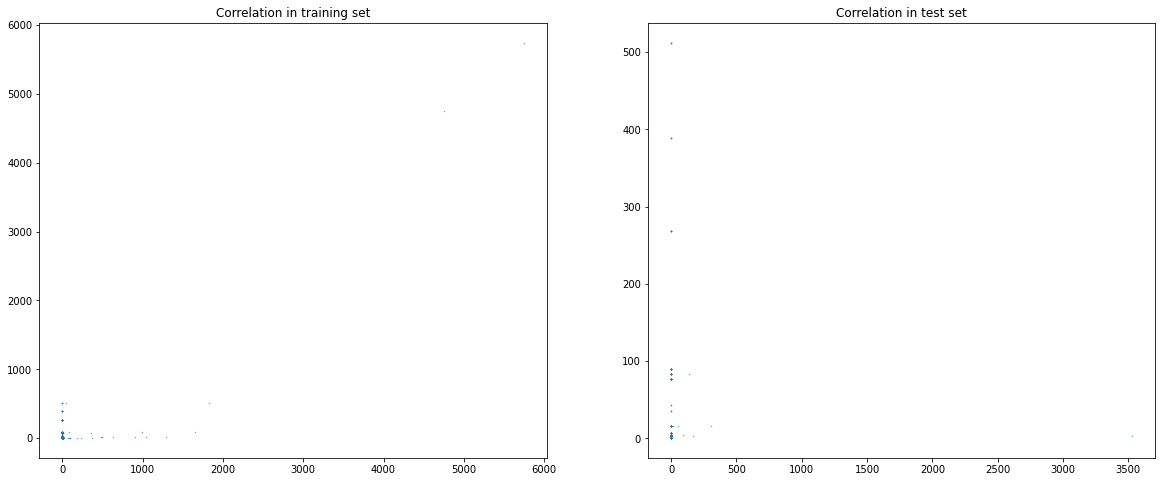

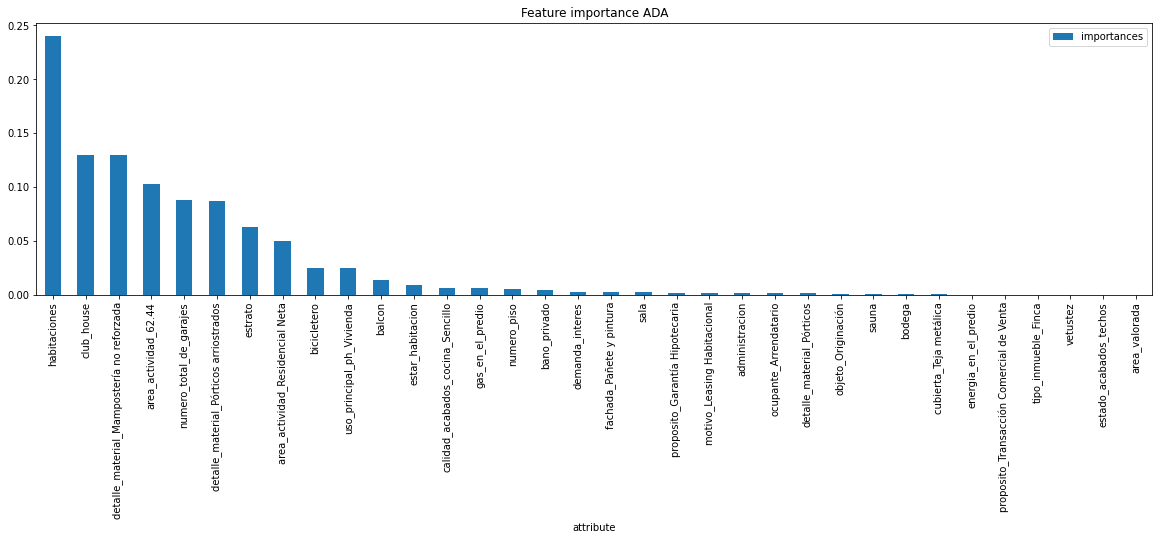

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

modelADAB = AdaBoostRegressor(n_estimators=100)
modelADAB.fit(trainXX, trainY)

plotScatterModel(trainXX, trainY, testXX, testY, modelADAB)
graph_importances(modelADAB)

## Random Forest regressor

R2
{'Training': 0.7187188399449757, 'Test': -0.6468094972361824}

MAPE
{'Training ': 43490.91760676576, 'Test': 140915.37104682645}


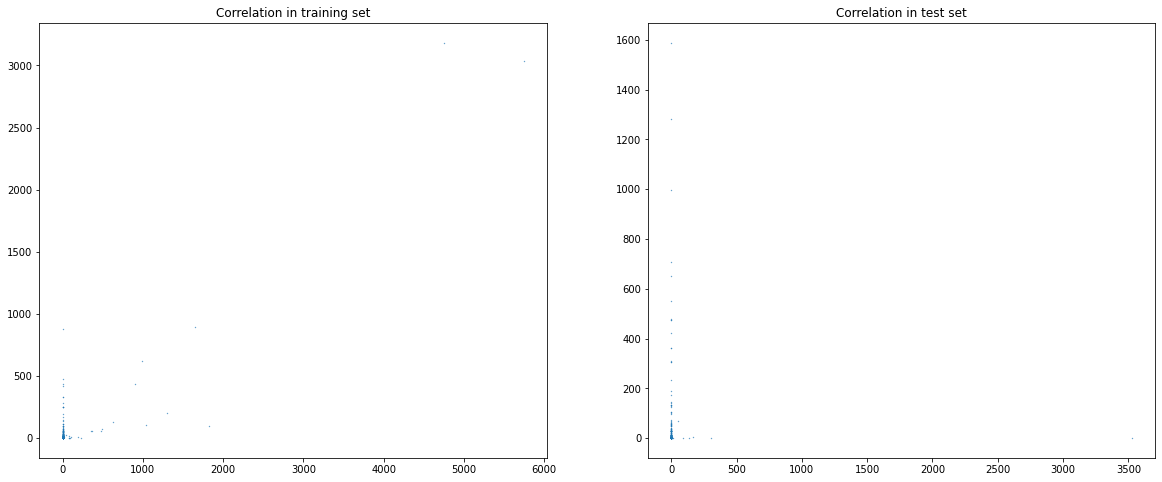

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Completar
modelRFR = RandomForestRegressor(max_depth=5)
modelRFR.fit(trainXX, trainY)
plotScatterModel(trainXX, trainY, testXX, testY, modelRFR)

## Red neuronal

R2
{'Training': 0.19672781249136873, 'Test': -0.357402575728891}

MAPE
{'Training ': 336066.8410485645, 'Test': 705295.4636067948}


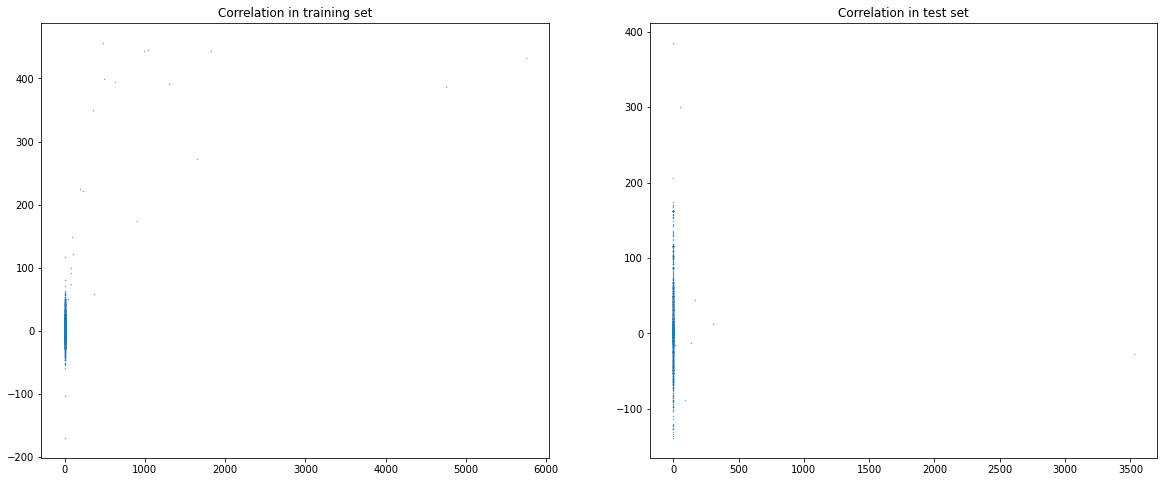

In [16]:
from sklearn.neural_network import MLPRegressor

# Completar 

modelMLPR = MLPRegressor(activation = 'tanh', max_iter=200, hidden_layer_sizes=20, learning_rate='adaptive', solver='adam', learning_rate_init= 0.013)
modelMLPR.fit(trainXX, trainY)
plotScatterModel(trainXX, trainY, testXX, testY, modelMLPR)


In [17]:
data3 = trainData.loc[:, trainData.columns[modelADAB.feature_importances_> 0].values]
print(trainData.shape)
data3 = trainData.loc[:, trainData.columns[modelADAB.feature_importances_> 0.01].values] # Completar
print(data3.shape)

(9629, 763)
(9629, 11)


R2
{'Training': 0.2340935191586414, 'Test': -0.019135986529036364}

MAPE
{'Training ': 274574.2886549973, 'Test': 1887.3238585237332}
Tiempo de entrenamiento es: 0.8525850772857666


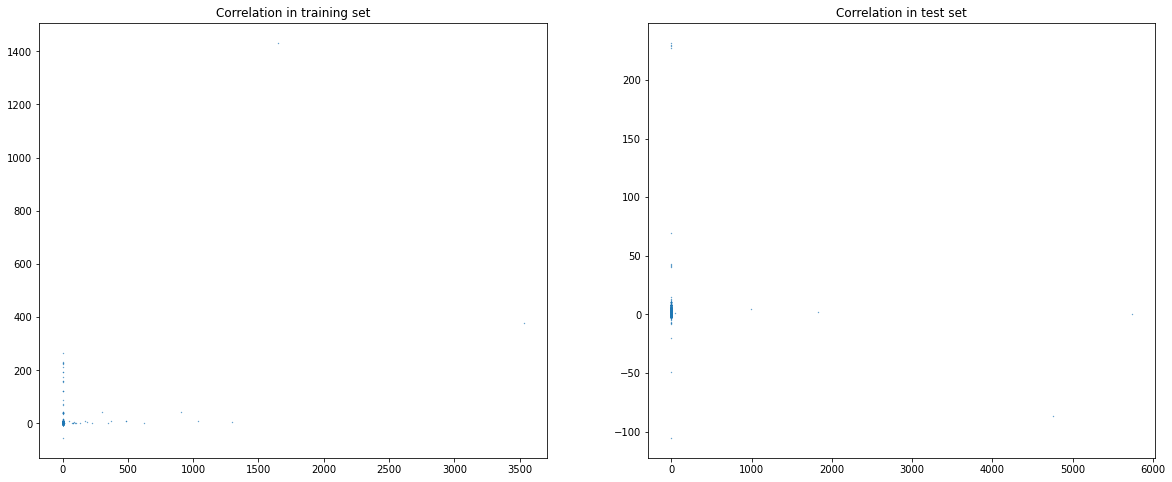

In [18]:
scaler = StandardScaler()  
scaler.fit(data3)

# Se divide el set de datos en dos conjuntos train y test
trainX, testX, trainY, testY = train_test_split(data3, y, test_size = 0.25)

# Don't cheat - fit only on training data
trainXX = scaler.transform(trainX)  
# apply same transformation to test data
testXX = scaler.transform(testX)
xg_reg2 = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.2, learning_rate=0.1, max_depth=5, alpha=5, n_estimators=200)
start = time.time()
xg_reg2.fit(trainXX, trainY)
stop = time.time()
plotScatterModel(trainXX, trainY, testXX, testY, xg_reg2)
print('Tiempo de entrenamiento es:' , stop-start)

In [21]:

data4 = trainData.loc[:, trainData.columns[modelDTR.feature_importances_> 0].values]
print(trainData.shape)
data4 = trainData.loc[:, trainData.columns[modelDTR.feature_importances_> 0.001].values] # Completar
print(data4.shape)

(9629, 763)
(9629, 23)


R2
{'Training': 0.9999375249001823, 'Test': -0.01385548605650544}

MAPE
{'Training ': 7.025576520047763, 'Test': 224.77812561137566}
Tiempo de entrenamiento es: 0.043225765228271484


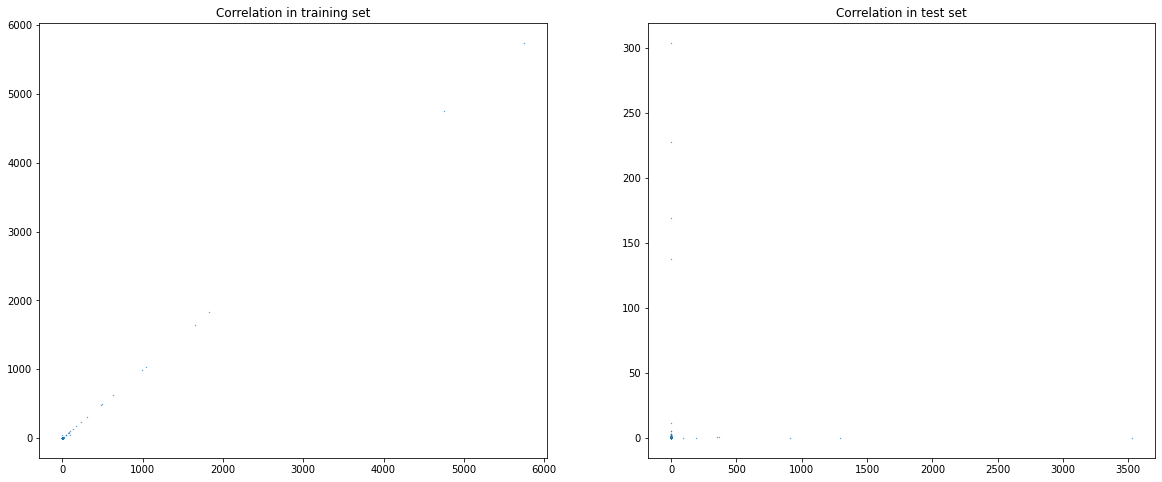

In [22]:
scaler.fit(data4)

# Se divide el set de datos en dos conjuntos train y test
trainX, testX, trainY, testY = train_test_split(data4, y, test_size = 0.25)

# Don't cheat - fit only on training data
trainXX = scaler.transform(trainX)  
# apply same transformation to test data
testXX = scaler.transform(testX)

start = time.time()
modelDTR.fit(trainXX, trainY);
stop = time.time()
plotScatterModel(trainXX, trainY, testXX, testY, modelDTR)
print('Tiempo de entrenamiento es:' , stop-start)